In [10]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray
import glob

## Concatenate variables and Check whether reach equilibrium

In [11]:
path = '/jet/home/xjliu/Tanguro_exp/Tanguro201412/'
files = sorted(glob.glob(path+'energyflux_d01_2014-12-*00:00:00'))

with xarray.open_dataset(files[0],decode_times=False,
                         mask_and_scale='True') as ds:
        TSLall = ds['TSLB']
        QSLall = ds['SMOIS']
        TSL_day = ds['TSLB']
        QSL_day = ds['SMOIS']
    
## concatenate the rest of files, starting from 01:00:00
for filename in files[1:]:       
    with xarray.open_dataset(filename,decode_times=False,
                         mask_and_scale='True') as ds:
        TSLall = xarray.concat([TSLall,ds['TSLB']],dim='Time')
        QSLall = xarray.concat([QSLall,ds['SMOIS']],dim='Time')
        TSL_day = xarray.concat([TSL_day,ds['TSLB']],dim='Day')
        QSL_day = xarray.concat([QSL_day,ds['SMOIS']],dim='Day')
       
    print(TSL_day.shape,filename)

(2, 24, 10, 80, 80) /jet/home/xjliu/Tanguro_exp/Tanguro201412/energyflux_d01_2014-12-02_00:00:00
(3, 24, 10, 80, 80) /jet/home/xjliu/Tanguro_exp/Tanguro201412/energyflux_d01_2014-12-03_00:00:00
(4, 24, 10, 80, 80) /jet/home/xjliu/Tanguro_exp/Tanguro201412/energyflux_d01_2014-12-04_00:00:00
(5, 24, 10, 80, 80) /jet/home/xjliu/Tanguro_exp/Tanguro201412/energyflux_d01_2014-12-05_00:00:00
(6, 24, 10, 80, 80) /jet/home/xjliu/Tanguro_exp/Tanguro201412/energyflux_d01_2014-12-06_00:00:00
(7, 24, 10, 80, 80) /jet/home/xjliu/Tanguro_exp/Tanguro201412/energyflux_d01_2014-12-07_00:00:00
(8, 24, 10, 80, 80) /jet/home/xjliu/Tanguro_exp/Tanguro201412/energyflux_d01_2014-12-08_00:00:00
(9, 24, 10, 80, 80) /jet/home/xjliu/Tanguro_exp/Tanguro201412/energyflux_d01_2014-12-09_00:00:00
(10, 24, 10, 80, 80) /jet/home/xjliu/Tanguro_exp/Tanguro201412/energyflux_d01_2014-12-10_00:00:00
(11, 24, 10, 80, 80) /jet/home/xjliu/Tanguro_exp/Tanguro201412/energyflux_d01_2014-12-11_00:00:00
(12, 24, 10, 80, 80) /jet/ho

### Plot the area-average of Soil temperature and moisture

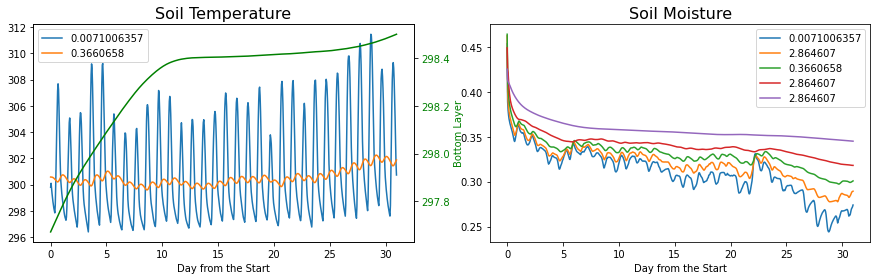

In [40]:
TSLmean = TSLall.mean(("west_east", "south_north"))
QSLmean = QSLall.mean(("west_east", "south_north"))

fig,axes = plt.subplots(1,2,figsize=(15,4),sharex=True)
axes = axes.ravel()
axes[0].plot(TSLmean[:,0],label=ds.ZS[0,0].values)
axes[0].plot(TSLmean[:,5],label=ds.ZS[0,5].values)

ax2 = axes[0].twinx()  # instantiate a second axes that shares the same x-axis
color = 'green'
ax2.set_ylabel('Bottom Layer', color=color)  # we already handled the x-label with ax1
#ax2.plot(TSLmean[:,5],label=ds.ZS[0,5].values,color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(TSLmean[:,9],label=ds.ZS[0,9].values,color=color)
axes[0].legend()
axes[0].set_title('Soil Temperature',fontsize=16)

axes[1].plot(QSLmean[:,0],label=ds.ZS[0,0].values)
axes[1].plot(QSLmean[:,3],label=ds.ZS[0,9].values)
axes[1].plot(QSLmean[:,5],label=ds.ZS[0,5].values)
axes[1].plot(QSLmean[:,7],label=ds.ZS[0,9].values)
axes[1].plot(QSLmean[:,9],label=ds.ZS[0,9].values)
axes[1].legend()
axes[1].set_title('Soil Moisture',fontsize=16)

for ii in range(2):
    axes[ii].set_xticks(np.arange(0,24*31,24*5))
    axes[ii].set_xticklabels(np.arange(0,31,5))
    axes[ii].set_xlabel('Day from the Start')
    

## Compare with observed soil moisture

In [4]:
path = '/ocean/projects/atm200007p/xjliu/DATA/Flux_Tower/'
data2 = pd.read_csv(path+'master_TDR_vwc_cm.csv')
data = data2.sort_values(by='date')

data['Year'] = data.apply(lambda row: int(row.date[:4]), axis=1)
data['Month'] = data.apply(lambda row: int(row.date[5:7]), axis=1)
data['Day'] = data.apply(lambda row: int(row.date[8:10]), axis=1)
data['Hour'] = data.apply(lambda row: int(row.date[11:13]), axis=1)

/ocean/projects/atm200007p/xjliu/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#### Diurnal cycle and subseasonal cycle

In [16]:
TSL_day_areamean = TSL_day.mean(("west_east", "south_north")).mean('Time')
QSL_day_areamean = QSL_day.mean(("west_east", "south_north")).mean('Time')


In [ ]:
wet_mean.shape
plt.contourf(wet_mean[['vwc030cm','vwc050cm','vwc100cm','vwc200cm','vwc300cm']])
wet_mean[['vwc030cm','vwc050cm','vwc100cm','vwc200cm','vwc300cm']]

In [24]:
QSL_day_areamean*100

<xarray.DataArray 'SMOIS' (Day: 31, soil_layers_stag: 10)>
array([[36.32536 , 36.447227, 36.645344, 36.944702, 37.350582, 37.85664 ,
        38.50257 , 38.844105, 40.483   , 40.115177],
       [35.057953, 35.152767, 35.29424 , 35.500435, 35.781197, 36.13415 ,
        36.571297, 36.761703, 38.044186, 38.327496],
       [34.22705 , 34.311913, 34.43965 , 34.628323, 34.889637, 35.226704,
        35.657753, 36.048138, 37.208847, 37.562798],
       [33.003242, 33.11559 , 33.283157, 33.532604, 33.886173, 34.352573,
        34.918236, 35.446938, 36.59151 , 37.068905],
       [32.29643 , 32.410347, 32.573936, 32.81584 , 33.1588  , 33.618416,
        34.20479 , 34.84543 , 36.048187, 36.68007 ],
       [33.202335, 33.269512, 33.355667, 33.471333, 33.61558 , 33.791878,
        34.05328 , 34.480198, 35.595963, 36.351456],
       [33.35472 , 33.4524  , 33.58516 , 33.765568, 33.98589 , 34.22452 ,
        34.44438 , 34.601463, 35.370968, 36.10153 ],
       [33.29928 , 33.403454, 33.543373, 33.735695, 33.979927, 34.25264 ,
        34.511295, 34.696136, 35.321644, 35.94911 ],
       [32.547043, 32.68818 , 32.87294 , 33.127228, 33.46087 , 33.86868 ,
        34.317448, 34.67814 , 35.32051 , 35.865612],
       [32.0377  , 32.218803, 32.44172 , 32.74093 , 33.117355, 33.54839 ,
        34.00799 , 34.47477 , 35.2643  , 35.813107],
...
       [29.535448, 30.025772, 30.316452, 30.801523, 31.416761, 32.05976 ,
        32.76037 , 33.474495, 34.41769 , 35.228325],
       [32.073505, 32.299404, 32.27977 , 32.417645, 32.687263, 32.89014 ,
        33.10773 , 33.45873 , 34.288933, 35.16657 ],
       [31.119255, 31.550064, 31.715675, 32.009228, 32.51542 , 32.97857 ,
        33.34712 , 33.631824, 34.30348 , 35.125015],
       [29.825487, 30.406036, 30.673481, 31.029268, 31.661352, 32.321365,
        32.942104, 33.47941 , 34.258755, 35.094963],
       [29.206026, 29.862558, 30.171848, 30.50812 , 31.106812, 31.767925,
        32.46877 , 33.186295, 34.115253, 35.038124],
       [28.162006, 28.979641, 29.395685, 29.847956, 30.579844, 31.40015 ,
        32.16882 , 32.92155 , 33.93377 , 34.95524 ],
       [26.78371 , 27.824244, 28.338654, 28.893223, 29.734924, 30.750074,
        31.719986, 32.636616, 33.745136, 34.859467],
       [25.809332, 26.980087, 27.547785, 28.16187 , 29.053684, 30.201513,
        31.295399, 32.334015, 33.544674, 34.757614],
       [25.93213 , 27.030014, 27.518957, 28.032034, 28.777256, 29.855541,
        30.953249, 32.058342, 33.34569 , 34.653152],
       [26.753298, 27.752161, 28.158108, 28.556814, 29.117998, 30.019423,
        30.898739, 31.87235 , 33.16453 , 34.550747]], dtype=float32)
Dimensions without coordinates: Day, soil_layers_stag

In [30]:
ds.ZS[0,:]

<xarray.DataArray 'ZS' (soil_layers_stag: 10)>
array([0.007101, 0.027925, 0.062259, 0.118865, 0.212193, 0.366066, 0.619759,
       1.038027, 1.727635, 2.864607], dtype=float32)
Coordinates:
    XTIME    float32 4.32e+04
Dimensions without coordinates: soil_layers_stag
Attributes:
    FieldType:    104
    MemoryOrder:  Z  
    description:  DEPTHS OF CENTERS OF SOIL LAYERS
    units:        m
    stagger:      Z

In [32]:
wet_mean.columns

Index(['Unnamed: 0', 'vwc030cm', 'vwc050cm', 'vwc100cm', 'vwc200cm',
       'vwc300cm', 'vwc400cm', 'vwc500cm', 'vwc600cm', 'vwc700cm', 'vwc800cm',
       'vwc900cm', 'total', 'Year', 'Month', 'Hour'],
      dtype='object')

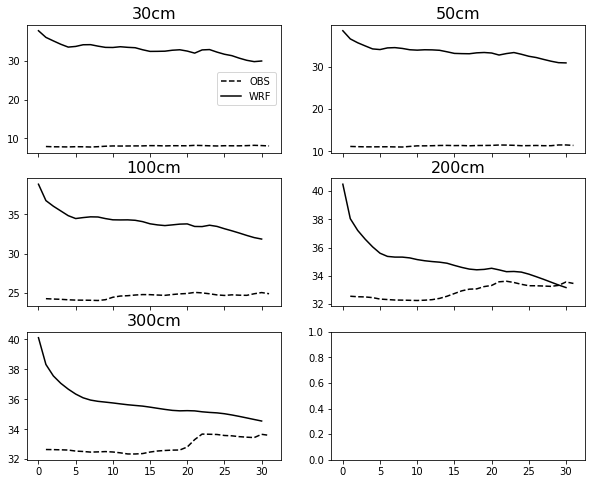

In [39]:
month_sel = [[1],[6,7,8]]
wet_mean = data[data.Month.isin(month_sel[0])].groupby('Day').mean()

fig,axes = plt.subplots(3,2,figsize=(10,8),sharex=True)
axes = axes.ravel()

axes[0].plot(wet_mean['vwc030cm'],'--k',label='OBS')
axes[0].plot(QSL_day_areamean[:,5]*100,'-k',label='WRF')

axes[1].plot(wet_mean['vwc050cm'],'--k',label='OBS')
axes[1].plot(QSL_day_areamean[:,6]*100,'-k',label='WRF')


axes[2].plot(wet_mean['vwc100cm'],'--k',label='OBS')
axes[2].plot(QSL_day_areamean[:,7]*100,'-k',label='WRF')


axes[3].plot(wet_mean['vwc200cm'],'--k',label='OBS')
axes[3].plot(QSL_day_areamean[:,8]*100,'-k',label='WRF')


axes[4].plot(wet_mean['vwc300cm'],'--k',label='OBS')
axes[4].plot(QSL_day_areamean[:,9]*100,'-k',label='WRF')

titles=['30cm','50cm','100cm','200cm','300cm']
for ii in range(5):
    axes[ii].set_title(titles[ii],fontsize=16)

axes[0].legend()
#plt.contourf(wet_mean[['vwc030cm','vwc050cm','vwc100cm','vwc200cm','vwc300cm']])


/ocean/projects/atm200007p/xjliu/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Unnamed: 0,date,vwc000cm,vwc030cm,vwc050cm,vwc100cm,vwc200cm,vwc300cm,vwc400cm,vwc500cm,vwc600cm,vwc700cm,vwc800cm,vwc900cm,total,pit,Year,Month,Hour
70413,70414,2011-01-01 00:00:00,5.2,8.82,12.13,25.7,34.0,33.9,34.0,34.7,33.7,33.7,33.7,50.2,340,A1C,2011,01,00
70414,70415,2011-01-01 06:00:00,5.17,8.77,12.13,25.8,34.0,34.0,34.0,34.7,33.7,33.7,33.7,50.2,340,A1C,2011,01,06
70415,70416,2011-01-01 12:00:00,5.2,8.76,12.11,25.9,34.1,34.0,34.1,34.8,33.7,33.7,33.7,50.2,340,A1C,2011,01,12
70416,70417,2011-01-01 18:00:00,5.31,8.78,12.11,25.9,34.1,34.1,34.1,34.8,33.7,33.7,33.7,50.2,340,A1C,2011,01,18
70417,70418,2011-01-02 00:00:00,5.27,8.79,12.15,25.9,34.1,34.1,34.1,34.8,33.7,33.7,33.7,50.2,340,A1C,2011,01,00
70418,70419,2011-01-02 06:00:00,5.26,8.77,12.15,25.9,34.1,34.1,34.2,34.8,33.7,33.7,33.7,50.2,341,A1C,2011,01,06
70419,70420,2011-01-02 12:00:00,5.39,8.88,12.21,26.0,34.1,34.1,34.2,34.9,33.7,33.7,33.7,50.2,341,A1C,2011,01,12
70420,70421,2011-01-02 18:00:00,5.3,8.86,12.31,26.1,34.1,34.1,34.2,34.9,33.8,33.7,33.7,50.2,341,A1C,2011,01,18
70421,70422,2011-01-03 00:00:00,5.37,8.88,12.30,26.3,34.2,34.1,34.2,35.0,33.8,33.7,33.7,50.2,342,A1C,2011,01,00
70422,70423,2011-01-03 06:00:00,5.33,8.88,12.33,26.4,34.4,34.2,34.3,35.0,33.8,33.7,33.7,50.2,342,A1C,2011,01,06


In [53]:
data.assign('Year'=data.date[:][:4])

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-53-f3993eaa76dd>, line 1)

In [45]:
data.columns

Index(['Unnamed: 0', 'date', 'vwc000cm', 'vwc030cm', 'vwc050cm', 'vwc100cm',
       'vwc200cm', 'vwc300cm', 'vwc400cm', 'vwc500cm', 'vwc600cm', 'vwc700cm',
       'vwc800cm', 'vwc900cm', 'total', 'pit'],
      dtype='object')